# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,ttest_ind,levene,binom,f_oneway
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotplotlib inline

UsageError: Line magic function `%matplotplotlib` not found.


In [2]:
df = pd.read_csv("petrol.csv")
print(df.head())
df.describe()

   tax   income   highway     dl   consumption
0  9.0     3571      1976  0.525           541
1  9.0     4092      1250  0.572           524
2  9.0     3865      1586  0.580           561
3  7.5     4870      2351  0.529           414
4  8.0     4399       431  0.544           410


,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
tax             48 non-null float64
 income         48 non-null int64
 highway        48 non-null int64
 dl             48 non-null float64
 consumption    48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [4]:
# Creating a new data frame which I will be making the changes without hampering the original data set
df.to_csv("./preprocessed.csv", index = False)
new_df = pd.read_csv("./preprocessed.csv")

In [5]:
new_df.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

([<matplotlib.axis.XTick at 0xb2c6080>,
 <a list of 5 Text xticklabel objects>)

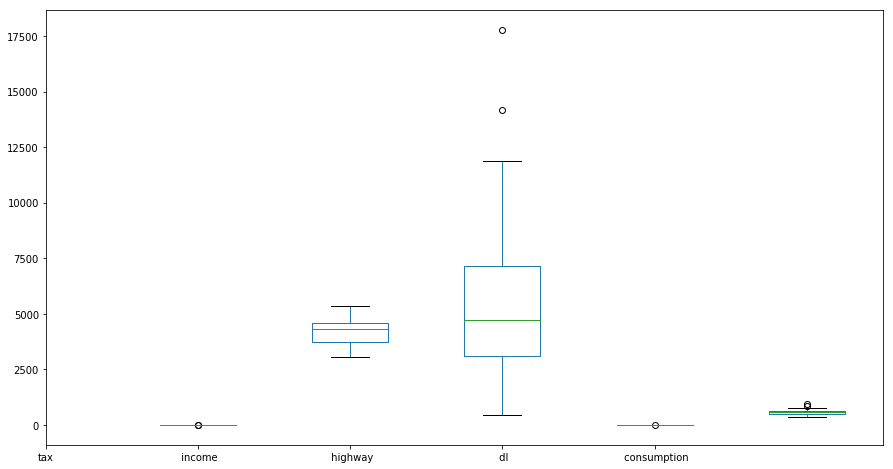

In [6]:
#plotting a boxplot to check if there is any outliner and we can see there are some outlier in dl column
new_df.plot.box(figsize=(15,8))
plt.xticks(list(range(len(df.columns))),df.columns, rotation="horizontal")

In [7]:
# q1, q3= np.percentile(df,[25,75])
# print("25th percentile is : ",q1)
# print("75th percentile is : ",q3)
# iqr = q3-q1
# print("IQR = ",iqr)
# floor = q1-1.5*iqr
# print("floor = ",floor)
# ceiling = q3+1.5*iqr
# print("ceiling = ",ceiling)
q1 = new_df.quantile(.25)
q3 = new_df.quantile(.75)
IQR = q3-q1
lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)
outlierremoved = new_df.where((new_df>=lower_bound) & (new_df<=upper_bound))
outlierremoved

,tax,income,highway,dl,consumption
0,9.00,3571,1976.0,0.525,541.0
1,9.00,4092,1250.0,0.572,524.0
2,9.00,3865,1586.0,0.580,561.0
3,7.50,4870,2351.0,0.529,414.0
4,8.00,4399,431.0,0.544,410.0
5,NaN,5342,1333.0,0.571,457.0
6,8.00,5319,11868.0,0.451,344.0
7,8.00,5126,2138.0,0.553,467.0
8,8.00,4447,8577.0,0.529,464.0
9,7.00,4512,8507.0,0.552,498.0


In [8]:
print(outlierremoved.columns.tolist())
# Oops, very clever. added extra spaces...hmmmm.. okay... let me try to delete the extra spaces
outlierremoved.columns = outlierremoved.columns.str.replace(' ', '') # deleting spaces every where
print(outlierremoved.columns.tolist()) # Printing after deleting spaces

['tax', ' income', ' highway', ' dl', ' consumption']
['tax', 'income', 'highway', 'dl', 'consumption']


In [9]:
# cleanDataset = outlierremoved.dropna(subset = ['highway','consumption'])
cleanDataset = outlierremoved.dropna()
cleanDataset

,tax,income,highway,dl,consumption
0,9.00,3571,1976.0,0.525,541.0
1,9.00,4092,1250.0,0.572,524.0
2,9.00,3865,1586.0,0.580,561.0
3,7.50,4870,2351.0,0.529,414.0
4,8.00,4399,431.0,0.544,410.0
6,8.00,5319,11868.0,0.451,344.0
7,8.00,5126,2138.0,0.553,467.0
8,8.00,4447,8577.0,0.529,464.0
9,7.00,4512,8507.0,0.552,498.0
10,8.00,4391,5939.0,0.530,580.0


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [10]:
cleanDataset.corr()

,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


In [11]:
# It is clearly seen that dl attribute has stronger association with dependent variable consumption.

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [12]:
# X = new_df["dl"]
# Y = new_df["consumption"]
# 
X = cleanDataset[['dl','income']].values
Y = cleanDataset['consumption']
#Y = cleanDataset['consumption'].values.reshape(-1,1)

In [13]:
print(X.shape)
print(Y.shape)

(43, 2)
(43,)


In [14]:
cleanDataset

,tax,income,highway,dl,consumption
0,9.00,3571,1976.0,0.525,541.0
1,9.00,4092,1250.0,0.572,524.0
2,9.00,3865,1586.0,0.580,561.0
3,7.50,4870,2351.0,0.529,414.0
4,8.00,4399,431.0,0.544,410.0
6,8.00,5319,11868.0,0.451,344.0
7,8.00,5126,2138.0,0.553,467.0
8,8.00,4447,8577.0,0.529,464.0
9,7.00,4512,8507.0,0.552,498.0
10,8.00,4391,5939.0,0.530,580.0


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [16]:
print("So train and test has the shape of : ",X_train.shape,y_test.shape)

So train and test has the shape of :  (34, 2) (9,)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [17]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [18]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
#To retrieve the intercept:
print(regr.intercept_)
#For retrieving the slope:
print(regr.coef_)

285.8509848386636
[ 9.92004963e+02 -6.99740232e-02]


In [20]:
Y=regr.coef_*X_train+regr.intercept_
Y

array([[ 8.29469705e+02,  4.45805529e+01],
       [ 8.88990003e+02, -1.72764836e+01],
       [ 8.60221859e+02,  1.67308917e+01],
       [ 8.34429730e+02, -7.28358580e+01],
       [ 7.74909432e+02,  3.38745274e+01],
       [ 8.67165893e+02,  1.31622165e+01],
       [ 8.52285819e+02, -2.73527429e+01],
       [ 8.10621610e+02, -2.53234962e+01],
       [ 8.06653591e+02,  3.59737481e+01],
       [ 9.43550276e+02, -3.55397036e+01],
       [ 9.09822107e+02,  1.98097487e+01],
       [ 8.25501685e+02,  2.54776446e+01],
       [ 7.68957402e+02,  3.89826311e+01],
       [ 8.61213864e+02,  1.54013852e+01],
       [ 8.26493690e+02, -8.52973068e+00],
       [ 7.92765521e+02, -5.68118067e+01],
       [ 8.67165893e+02, -1.62968473e+01],
       [ 7.33245223e+02, -8.63408445e+01],
       [ 7.98717551e+02, -1.20984059e+01],
       [ 8.84029978e+02, -1.50373148e+01],
       [ 8.32445720e+02, -3.42101972e+01],
       [ 8.59229854e+02,  7.15205518e+01],
       [ 7.94749531e+02,  5.26275656e+01],
       [ 8.

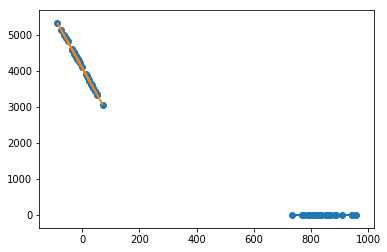

In [21]:
plt.plot(Y,X_train)
plt.scatter(Y,X_train)

# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [22]:
y_pred = regr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)

In [23]:
print(mse,rmse)

8777.503512907973 93.68833178634345


In [24]:
regr.score(X_train,y_train)

0.6681961038303753

In [25]:
regr.score(X_test,y_test)

0.17689374240768319

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [26]:
X = cleanDataset[['dl','income','highway']].values
Y = cleanDataset['consumption']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [28]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Question 9: Print the coefficients of the multilinear regression model

In [29]:
#To retrieve the intercept:
print(regr.intercept_)
#For retrieving the slope:
print(regr.coef_)
Y=regr.coef_*X_train+regr.intercept_
Y

134.51435310912763
[ 1.23412473e+03 -6.66458782e-02  2.55481820e-03]


array([[ 952.73904908, -107.7434141 ,  142.87882789],
       [ 840.43369866, -138.20058044,  137.70787586],
       [ 970.0167953 , -154.7954041 ,  149.86881048],
       [ 910.77880827, -118.87327576,  154.52879887],
       [ 742.93784499, -105.47745425,  146.39425773],
       [ 847.83844704,  -69.62197178,  151.18198703],
       [ 809.58058041,  -89.21585997,  145.0427589 ],
       [ 907.07643408, -161.99315895,  146.36615473],
       [ 805.87820622, -113.47495963,  146.63952028],
       [ 816.98532879, -207.11241848,  139.97655442],
       [ 788.60046   , -158.12769801,  149.68741839],
       [ 805.87820622, -158.66086504,  135.61547975],
       [ 877.45744056, -197.5820579 ,  136.05235366],
       [ 829.32657609, -109.14297755,  144.69530363],
       [ 878.69156529, -152.0629231 ,  143.80111726],
       [ 773.79096324, -108.0766435 ,  152.15537276],
       [ 815.75120406, -166.19184928,  156.24819152],
       [ 866.35031799, -198.84832959,  159.53624254],
       [ 963.84617165, -213.

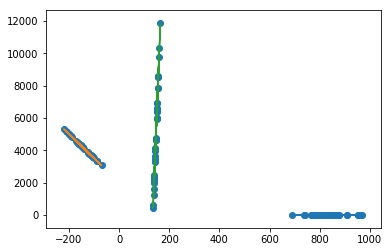

In [30]:
plt.plot(Y,X_train)
plt.scatter(Y,X_train)

In [31]:
y_pred = regr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)
print(mse,rmse)

1884.6300112068775 43.41232556782552


In [32]:
regr.score(X_train,y_train)

0.5951397144356885

In [33]:
regr.score(X_test,y_test)

0.29391752586606346

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### R squared value increase if we increase the number of independent variables to our analysis